In [16]:
!which python

/c/Users/MANNAN SHRAMA/Documents/Sem-4/MLPR/Project/GastroCAD/venv/Scripts/python


In [17]:
import os
import pandas as pd

print(os.getcwd())

c:\Users\MANNAN SHRAMA\Documents\Sem-4\MLPR\Project\GastroCAD\src\preprocessing


In [18]:
notebook_dir = os.getcwd()
sequnce_classification = os.path.join(notebook_dir, "..", "..", "data", "gastroHUN", "official_splits", "sequence_classification.csv")

df = pd.read_csv(sequnce_classification)
print( df.head().to_string() )

print(f"\nNo. of rows = no. of video-sequences = {len(df)}")
print(f"No. of unique patients = {df["num_patient"].nunique()}")

   Unnamed: 0  num_patient                                  filename FG1 (Team A) FG2 (Team A) G1 (Team B) G2 (Team B) Complete agreement Triple agreement FG agreement G agreement FG1-G1 agreement FG1-G2 agreement FG2-G1 agreement FG2-G2 agreement set_type
0           0            7  546c9947-d45a-45ec-982c-0022ba5c1a3b.mp4           G2           G2          G2          G2                 G2               G2           G2          G2               G2               G2               G2               G2    Train
1           1            7  f173a78c-6c93-484c-99c1-33213d262387.mp4           L2           L3          L2          L2                NaN               L2          NaN          L2               L2               L2              NaN              NaN    Train
2           2            7  0c14fc9a-3781-4fa9-b8f3-1ece0af92ebd.mp4           L3           L2          L2          L3                NaN              NaN          NaN         NaN              NaN               L3               L

In [19]:
# Finalize Label: First try "Complete_Agreement", then "FG", then "FG2-G1", and so on
# Performing this on the complete dataset

df["label"] = ( df["Complete agreement"].fillna(df["FG agreement"]) ).fillna( df["FG2-G1 agreement"] ).fillna(df["FG1-G2 agreement"]).fillna(df["G agreement"]).fillna(df["FG1-G1 agreement"]).fillna(df["FG2-G2 agreement"]).fillna(df["Triple agreement"])

# Check if any labels are still missing
missing_labels = df["label"].isnull().sum()
print(f"Missing labels after filling: {missing_labels}")
# 37 rows with missing labels. Drop these rows.

# Drop the rows which still have missing labels (Even if we loose 37 rows, not a big deal)
df = df.dropna(subset=["label"])

# Verifying rows are dropped
missing_labels = df["label"].isnull().sum()
print(f"Missing labels after dropping: {missing_labels}")


Missing labels after filling: 37
Missing labels after dropping: 0


In [20]:
print(df["label"].nunique())
print(df["label"].unique())

# *** 23 - 4 = 19



23
['G2' 'L2' 'P3' 'G4' 'L4' 'A4' 'P5' 'A6' 'L6' 'A1' 'L1' 'G1' 'P1' 'A2'
 'P2' 'G3' 'A3' 'L3' 'A5' 'L5' 'P6' 'OTHERCLASS' 'P4']


In [21]:
# Check for duplicate rows
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

# Check unique patient IDs
print(f"Total unique patients: {df['num_patient'].nunique()}")

# No. of rows in the dataset
print(f"Number of rows in the dataset: {len(df)}")

print(4729-37)

Number of duplicate rows: 0
Total unique patients: 223
Number of rows in the dataset: 4692
4692


In [22]:
print( df["set_type"].unique() )


['Train' 'Test' 'Validation']


In [23]:
# Split dataset based on 'set_type'
df_train = df[df["set_type"] == "Train"]
df_val = df[df["set_type"] == "Validation"]
df_test = df[df["set_type"] == "Test"]

# Print dataset sizes
print(f"Train set size: {len(df_train)}\nValidation set size: {len(df_val)}\nTest set size: {len(df_test)}")

Train set size: 3371
Validation set size: 650
Test set size: 671


## Performing EDA (on Training data)

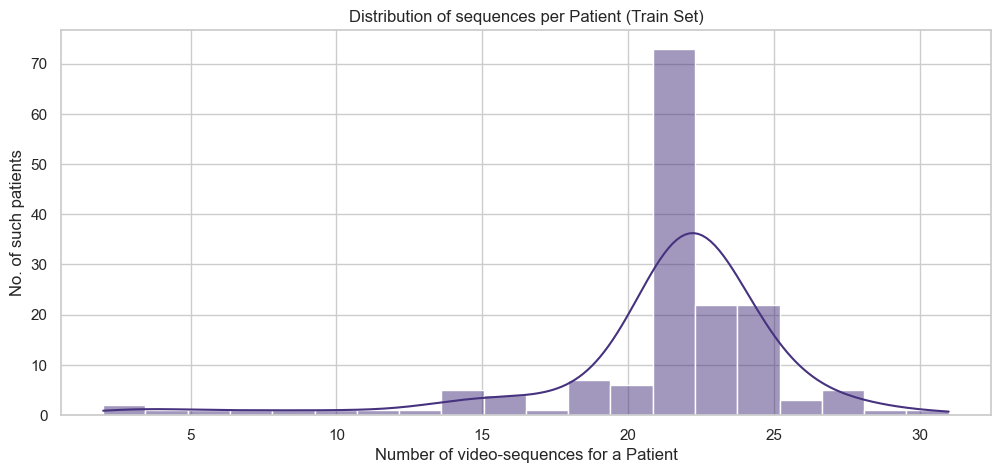

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a universal style and color palette for all plots
sns.set_theme(style="whitegrid", palette="viridis")

# Count video-sequences per patient (Train set only)
train_patient_counts = df_train["num_patient"].value_counts()
train_patient_counts

plt.figure(figsize=(12, 5))
sns.histplot(train_patient_counts, bins=20, kde=True)
plt.xlabel("Number of video-sequences for a Patient")
plt.ylabel("No. of such patients")
plt.title("Distribution of sequences per Patient (Train Set)")
plt.show()


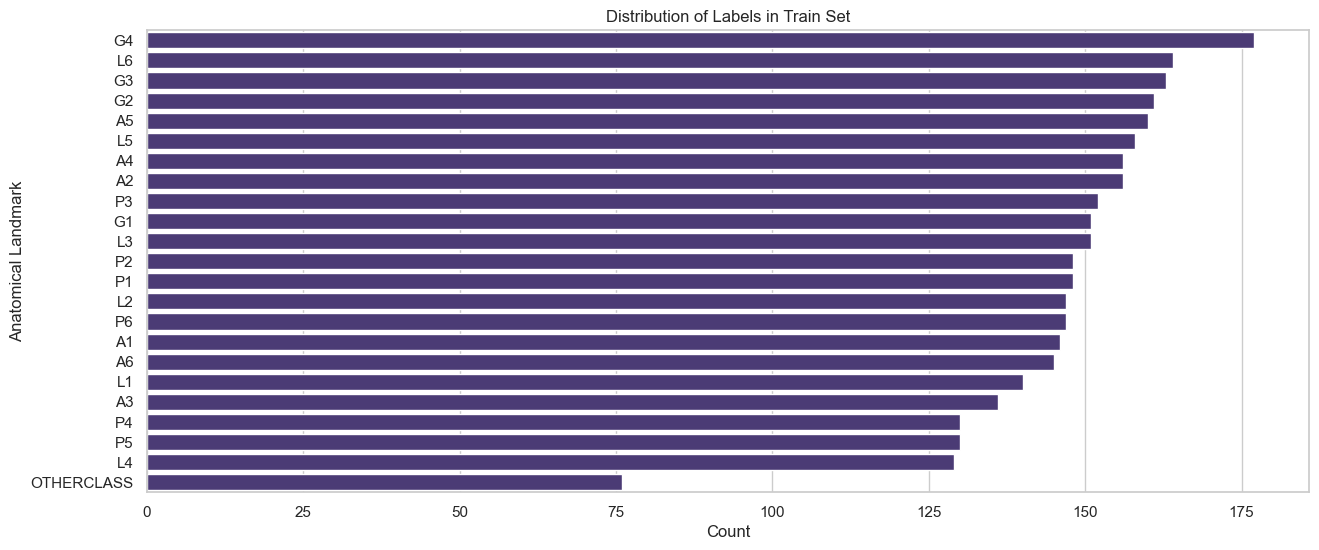

In [28]:
# Label Distribution(Train Set)

plt.figure(figsize=(15, 6))
sns.countplot(y=df_train["label"], order=df_train["label"].value_counts().index)
plt.xlabel("Count")
plt.ylabel("Anatomical Landmark")
plt.title("Distribution of Labels in Train Set")
plt.show()


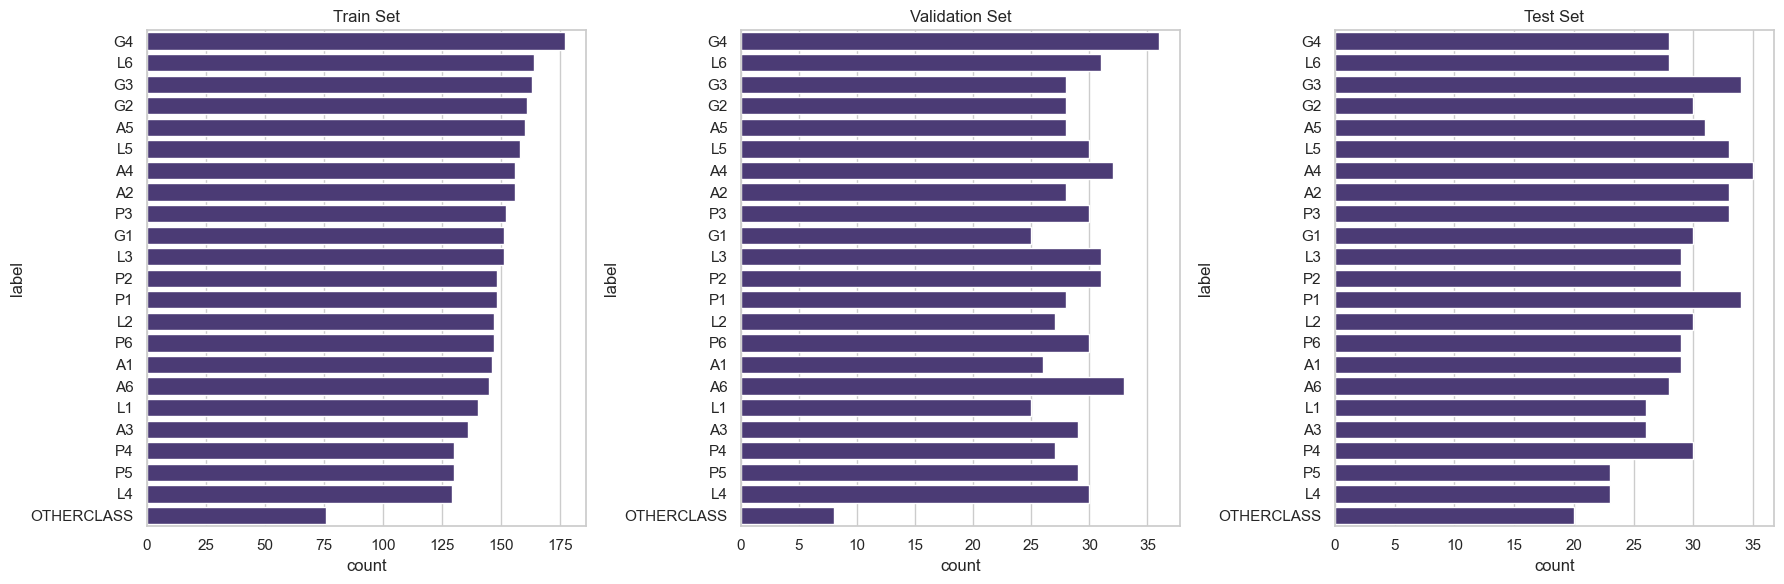

In [30]:
# Compare Class Distribution Across Train, Validation, and Test Sets

plt.figure(figsize=(18, 6))

# Train distribution
plt.subplot(1, 3, 1)
sns.countplot(y=df_train["label"], order=df_train["label"].value_counts().index)
plt.title("Train Set")

# Validation distribution
plt.subplot(1, 3, 2)
sns.countplot(y=df_val["label"], order=df_train["label"].value_counts().index)
plt.title("Validation Set")

# Test distribution
plt.subplot(1, 3, 3)
sns.countplot(y=df_test["label"], order=df_train["label"].value_counts().index)
plt.title("Test Set")

plt.tight_layout()
plt.show()
